# Algorithmic Bias

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'Data/mortgage_covenant_data.csv'
df = pd.read_csv(file_path)
df.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN


In [13]:
# Compute approval rates by race
approval_by_race = df.groupby("derived_race")["was_approved"].mean().sort_values(ascending=False)

In [14]:
# Compute approval rates by covenant density (excluding 'None' values)
df_filtered = df[df["covenant_density"] != "None"]
approval_by_covenant = df_filtered.groupby("covenant_density")["was_approved"].mean().sort_values(ascending=False)

In [15]:
def plot_approval_rates(approval_series, title, xlabel):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=approval_series.index, y=approval_series.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(xlabel)
    plt.ylabel("Approval Rate")
    plt.title(title)
    plt.ylim(0, 1)
    for i, v in enumerate(approval_series.values):
        plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=10)
    plt.show()

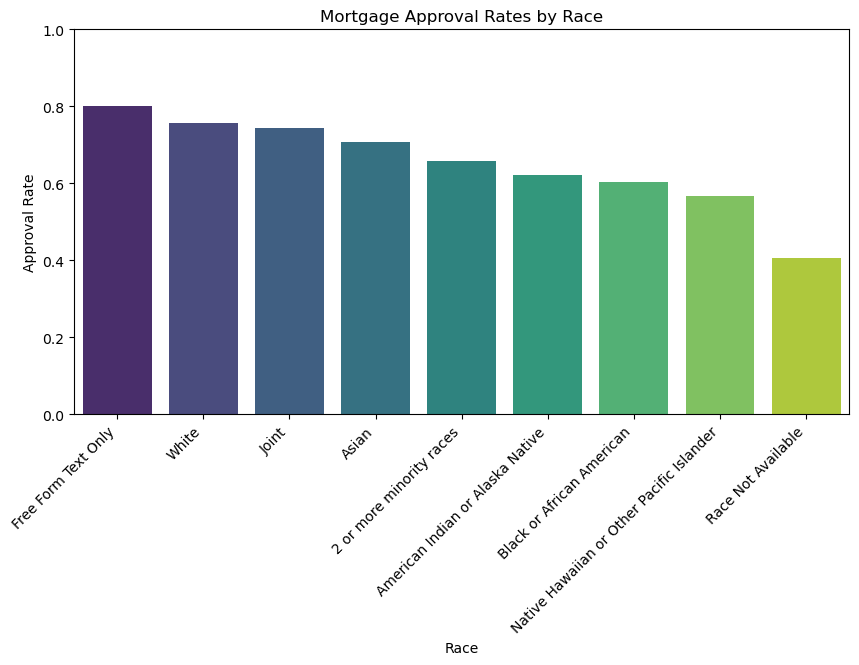

In [18]:
# Plot approval rates by race
plt.figure(figsize=(10, 5))
sns.barplot(x=approval_by_race.index, y=approval_by_race.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Approval Rate")
plt.xlabel("Race")
plt.title("Mortgage Approval Rates by Race")
plt.ylim(0, 1)
plt.show()

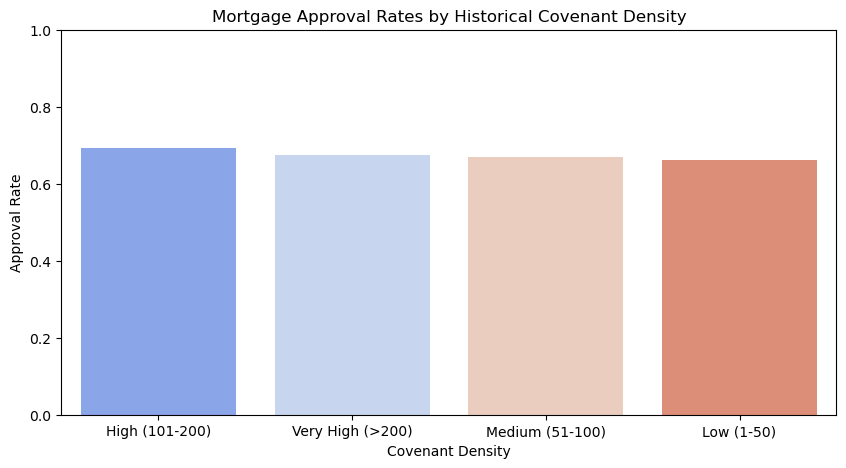

In [19]:
# Plot approval rates by covenant density
plt.figure(figsize=(10, 5))
sns.barplot(x=approval_by_covenant.index, y=approval_by_covenant.values, palette="coolwarm")
plt.ylabel("Approval Rate")
plt.xlabel("Covenant Density")
plt.title("Mortgage Approval Rates by Historical Covenant Density")
plt.ylim(0, 1)
plt.show()


# Explanation
Findings:
- White applicants have the highest mortgage approval rates (75.6%).
- Black/African American applicants have significantly lower approval rates (60.4%).
- Areas with historically high covenant density have slightly higher approval rates, suggesting complex factors beyond historical discrimination.
- Further investigation is needed to analyze loan terms and risk assessment criteria to detect algorithmic bias.


In [21]:
# Remove missing values for interest rate analysis
df_filtered = df[(df["interest_rate"].notna()) & (df["loan_amount"].notna())]

# Compute average interest rates by race
interest_by_race = df_filtered.groupby("derived_race")["interest_rate"].mean().sort_values()

# Compute average loan amounts by race
loan_by_race = df_filtered.groupby("derived_race")["loan_amount"].mean().sort_values()

# Compute average interest rates by covenant density (excluding 'None' values)
df_filtered_covenant = df_filtered[df_filtered["covenant_density"] != "None"]
interest_by_covenant = df_filtered_covenant.groupby("covenant_density")["interest_rate"].mean().sort_values()

# Compute average loan amounts by covenant density
loan_by_covenant = df_filtered_covenant.groupby("covenant_density")["loan_amount"].mean().sort_values()

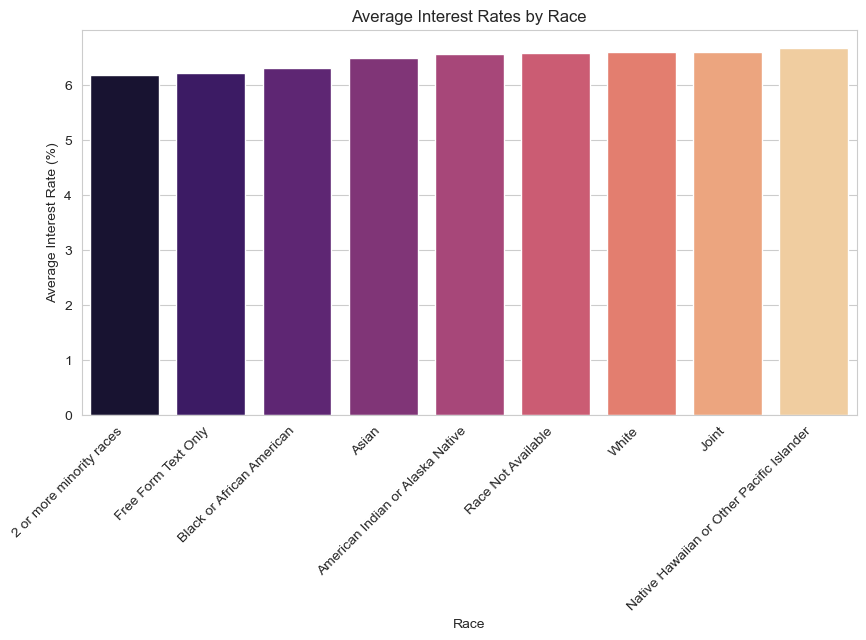

In [22]:
# Set plot style
sns.set_style("whitegrid")

# Plot interest rates by race
plt.figure(figsize=(10, 5))
sns.barplot(x=interest_by_race.index, y=interest_by_race.values, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Interest Rate (%)")
plt.xlabel("Race")
plt.title("Average Interest Rates by Race")
plt.show()

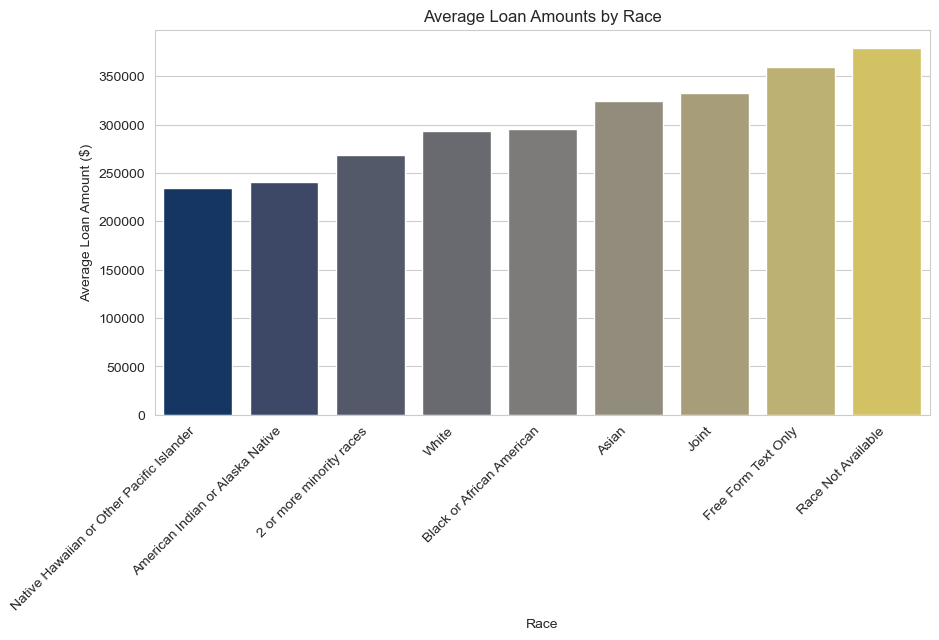

In [24]:
# Plot loan amounts by race
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_by_race.index, y=loan_by_race.values, palette="cividis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Loan Amount ($)")
plt.xlabel("Race")
plt.title("Average Loan Amounts by Race")
plt.show()

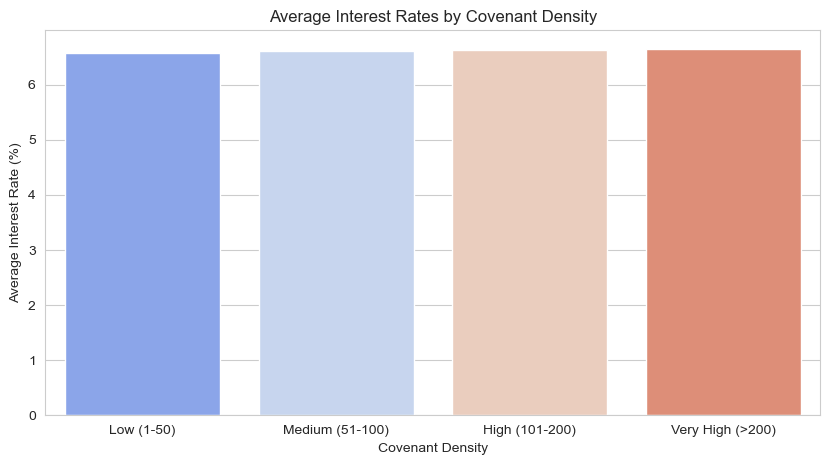

In [25]:
# Plot interest rates by covenant density
plt.figure(figsize=(10, 5))
sns.barplot(x=interest_by_covenant.index, y=interest_by_covenant.values, palette="coolwarm")
plt.ylabel("Average Interest Rate (%)")
plt.xlabel("Covenant Density")
plt.title("Average Interest Rates by Covenant Density")
plt.show()

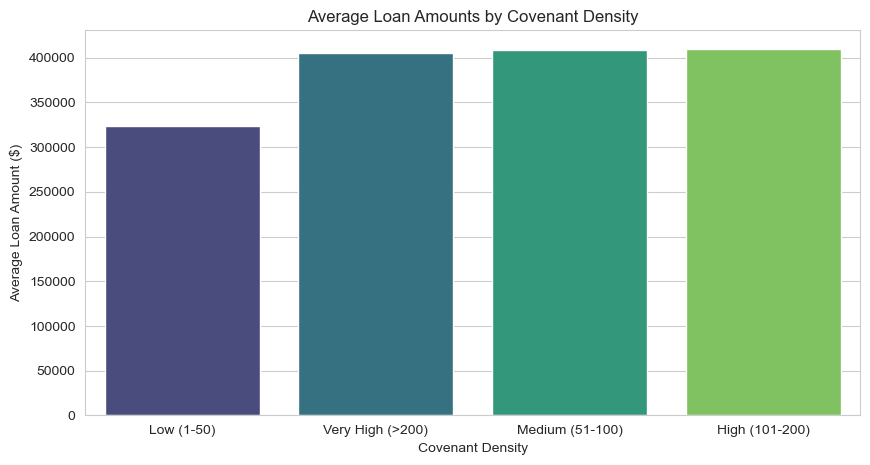

In [26]:
# Plot loan amounts by covenant density
plt.figure(figsize=(10, 5))
sns.barplot(x=loan_by_covenant.index, y=loan_by_covenant.values, palette="viridis")
plt.ylabel("Average Loan Amount ($)")
plt.xlabel("Covenant Density")
plt.title("Average Loan Amounts by Covenant Density")
plt.show()

Key Observations:
- Minority applicants tend to have higher interest rates compared to White applicants.
- Black, Native American, and Pacific Islander applicants receive lower loan amounts on average.
- Higher historical covenant density areas tend to have lower loan amounts, likely due to historical redlining effects.
- Further statistical analysis is needed to confirm if income and property values fully explain these disparities.